#Task 5 : Wine quality prediction

Name : Balaji Preetham D

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")

### Upload Dataset

In [4]:
from google.colab import files
a = files.upload()

Saving winequality-red.csv to winequality-red (1).csv


# Load Dataset

In [5]:
df = pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
# check shape
df.shape

(1599, 12)

In [7]:
# check some information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
# check description
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
# check null values
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: >

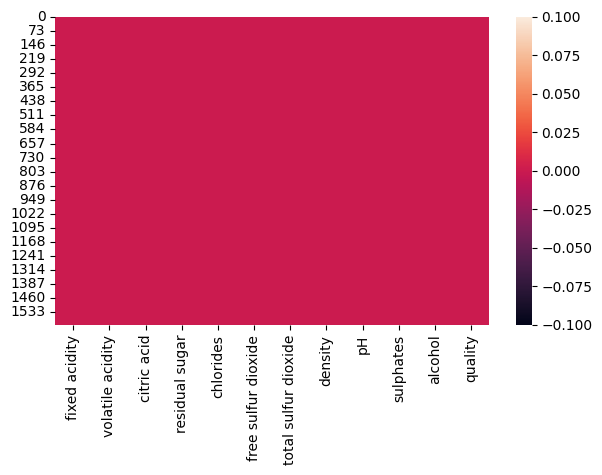

In [10]:
plt.figure(figsize=(7,4))
sns.heatmap(df.isnull())

In [11]:
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [12]:
df.quality.value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

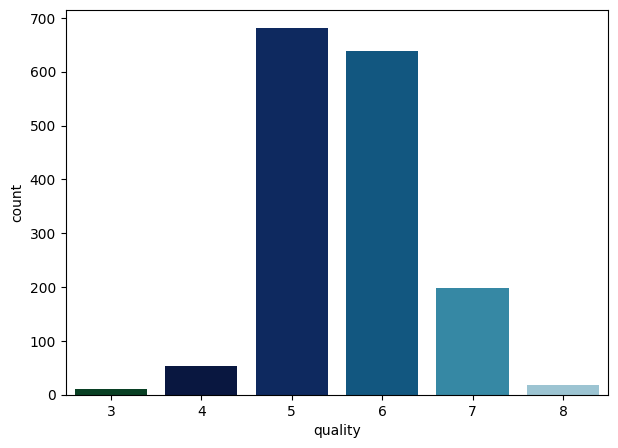

In [13]:
# Number of wines in each quality category
plt.figure(figsize=(7,5))
sns.countplot(x='quality', data=df, palette='ocean');

It seems that 5 and 6 quality wines are the most popular

# Visualize Data and gain some insights

In [14]:
# look for correlations
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


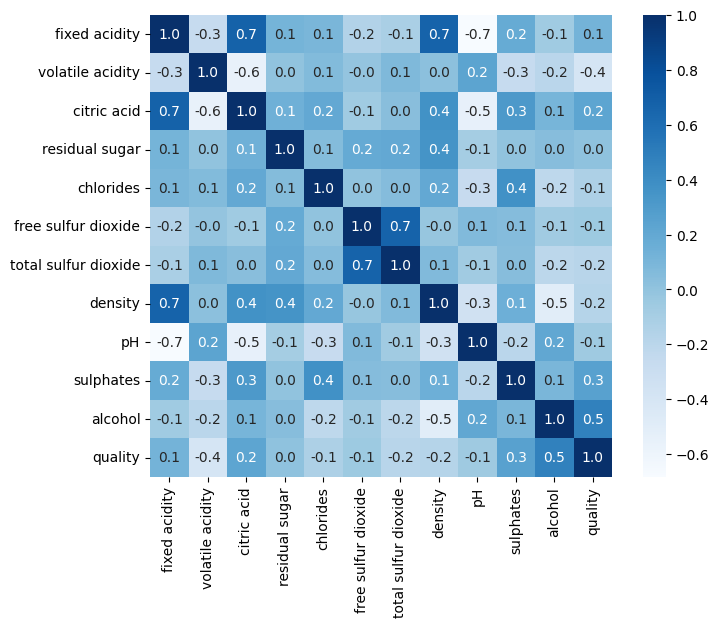

In [15]:
# visualize correlations
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':10}, cmap = 'Blues');

- Fixed acidity is highly positivily correlated with citric acid and density
- Fixed acidity is highly negativaly correlated with pH
- Free sulfur dixoid is highly positivily correlated with total sulfur dioxide
- Quality is around 50% positivily correlated with alcohol

<Figure size 400x300 with 0 Axes>

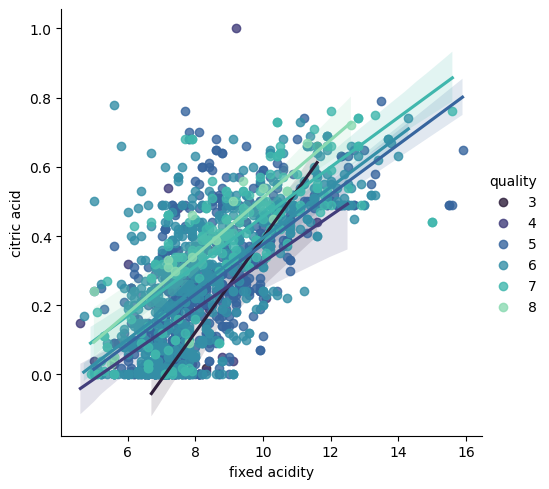

In [16]:
# Plot the correlated features
plt.figure(figsize=(4,3))
sns.lmplot(y='citric acid', x='fixed acidity', hue='quality', data=df, palette='mako');

<Figure size 400x300 with 0 Axes>

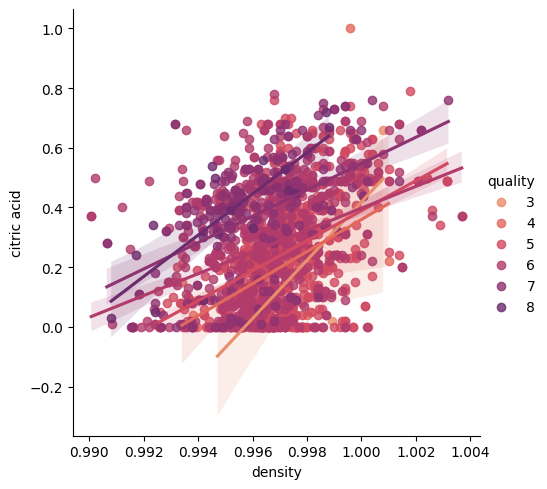

In [17]:
plt.figure(figsize=(4,3))
sns.lmplot(y='citric acid', x='density', hue='quality', data=df, palette='flare');

<Figure size 400x300 with 0 Axes>

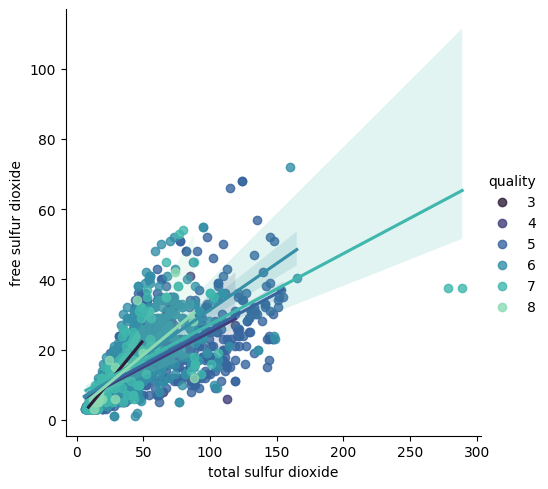

In [18]:
plt.figure(figsize=(4,3))
sns.lmplot(y='free sulfur dioxide', x='total sulfur dioxide', hue='quality', data=df, palette='mako');

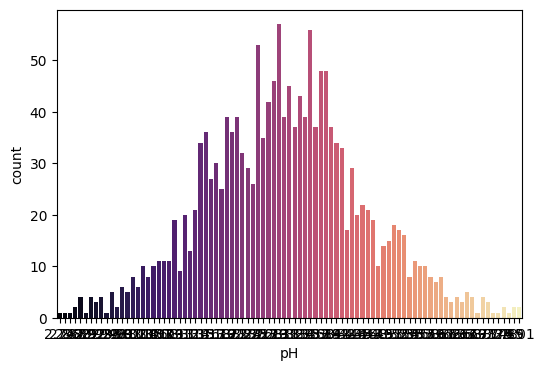

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(data=df ,x="pH", palette='magma');

<Axes: xlabel='quality', ylabel='fixed acidity'>

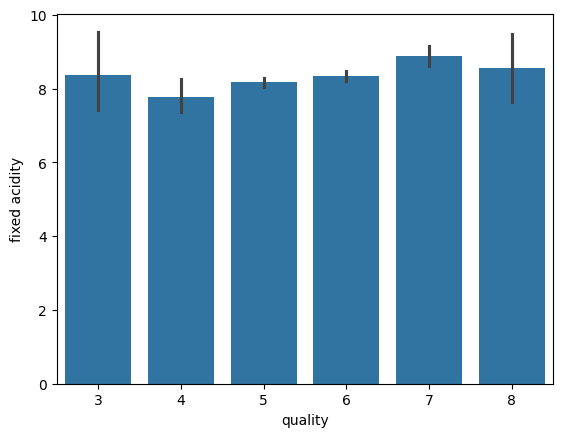

In [20]:
# plotting a barplot for quality vs fixed acidity
sns.barplot(x='quality', y='fixed acidity', data=df)

<Axes: xlabel='quality', ylabel='alcohol'>

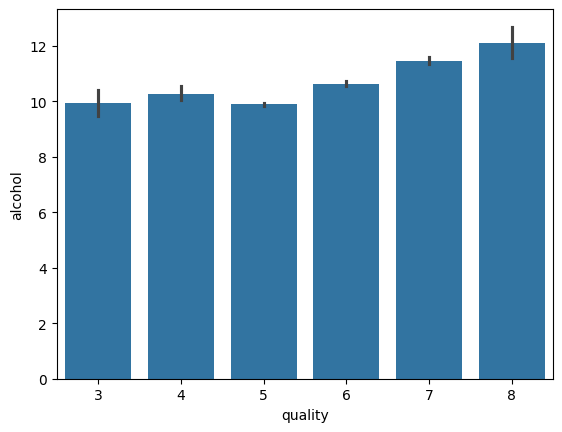

In [21]:
# plotting a barplot for quality vs alcohol
sns.barplot(x='quality', y='alcohol', data=df)

# Feature Engineering


In [22]:
X = df.drop('quality', axis= 1)
y = df['quality'].apply(lambda y_value: 1 if y_value >= 7 else 0)

# Scalling data

In [23]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [24]:
y.value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

# Spliting data into training and testing


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=0)

# Modeling using RandomForest Classifier



In [26]:
model = RandomForestClassifier(min_samples_split=2, max_depth=20, n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, random_state=42)

In [27]:
#accuracy on test data
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy is :", test_accuracy * 100, "%")

Test accuracy is : 92.5 %


In [28]:
# classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       355
           1       0.70      0.58      0.63        45

    accuracy                           0.93       400
   macro avg       0.83      0.77      0.80       400
weighted avg       0.92      0.93      0.92       400



<Axes: >

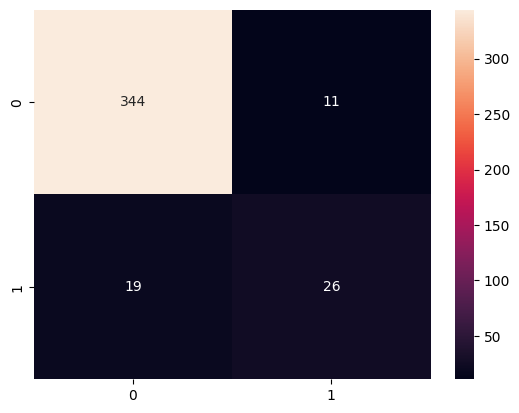

In [29]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')